In [1]:
from glob import glob
from datetime import datetime, timezone

import netCDF4
import matplotlib.pyplot as plt

import pyart

import read_mira_radar


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
data_path = "/home/camila/git/amazon-storms-aerosols/data/radar/mira_campina/"

# Single file
# pmira, pmira_melthei, pmira_mrm = read_mira_radar.read_mira(data_path + "2021/06/09/20210609_0000.mmclx")
# mira1 = netCDF4.Dataset(data_path + "2021/09/28/20210928_1500.mmclx")
# mira2 = netCDF4.Dataset(data_path + "2021/09/28/20210928_0900.mmclx")

# Multiple files
files = sorted(glob(data_path + "2021/06/09/" + "*.mmclx", recursive=True))
pmira_24h, pmira_melthei_24h, pmira_mrm_24h = read_mira_radar.read_multi_mira(
    files, for_quicklooks=True, ql_res=2
)
# files = []
# files.append(sorted(glob(data_path + "2021/06/11/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/12/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/13/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/14/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/15/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/16/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/17/" + "*.mmclx", recursive=True)))
# files = [item for sublist in files for item in sublist]
# # print(files)
# pmira_w, pmira_melthei_w, pmira_mrm_w = read_mira_radar.read_multi_mira(
#     files, for_quicklooks=True, ql_res=30
# )

/home/camila/miniconda3/envs/amazon-storms-aerosols/lib/python3.9/site-packages/skimage/measure/block.py:86: RuntimeWarning: All-NaN slice encountered
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


In [ ]:
for var in mira.variables.keys():
    print(var, "-", mira.variables[var].long_name)

# print(mira.fields.keys())
# print(mira.variables["npw1"])

/home/camila/miniconda3/envs/amazon-storms-aerosols/lib/python3.9/site-packages/pyart/graph/radardisplay.py:648: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pm = ax.pcolormesh(


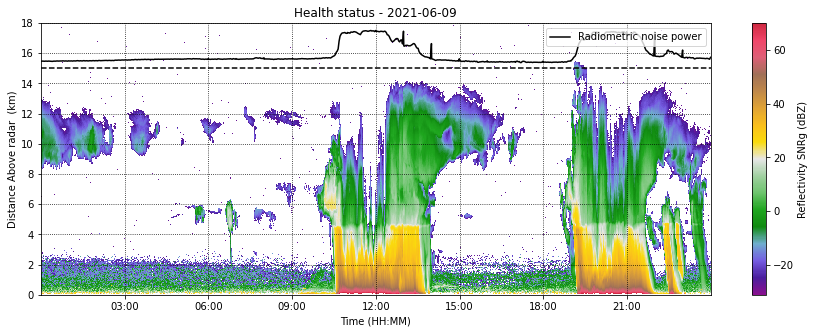

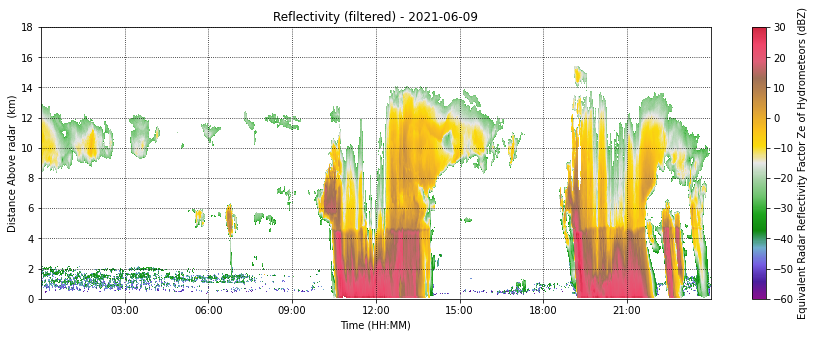

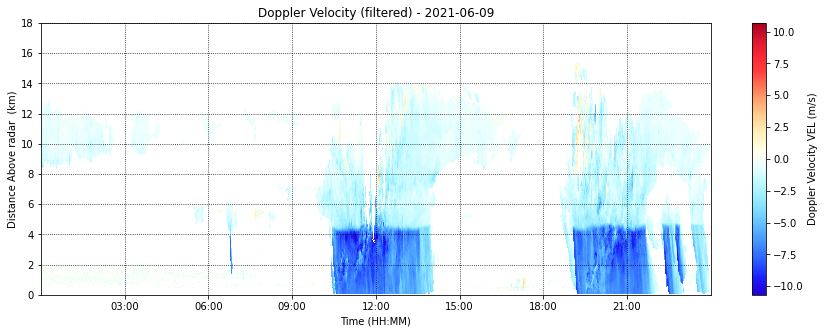

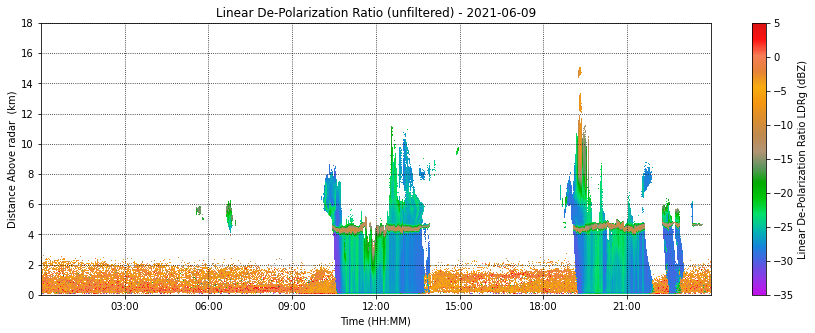

In [4]:
times = pyart.util.datetimes_from_radar(pmira_24h)
times = times.astype("datetime64[ns]")
date_str = str(times[0])[:10]

# Health
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "SNRg",
        vmin=pmira_24h.fields["SNRg"]["yrange"][0],
        vmax=pmira_24h.fields["SNRg"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Health status - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.plot(times, 5 + pmira_mrm_24h["data"]*1e1, "k-", label="Radiometric noise power")
plt.axhline(y=15, color="k", linestyle="dashed")
display.plot_grid_lines()
plt.ylim((0, 18))
plt.legend(loc="upper right")
plt.savefig("figs/Mira35_Health_Campina_" + date_str.replace("-", "_") + ".png", dpi=300, bbox_inches="tight")

# Reflectivity
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "Ze",
        vmin=pmira_24h.fields["Ze"]["yrange"][0],
        vmax=pmira_24h.fields["Ze"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Reflectivity (filtered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
display.plot_grid_lines()
plt.ylim((0, 18))
plt.savefig("figs/Mira35_Reflectivity_Campina_" + date_str.replace("-", "_") + ".png", dpi=300, bbox_inches="tight")

# Vel_Doppler
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "VEL",
        vmin=pmira_24h.fields["VEL"]["yrange"][0],
        vmax=pmira_24h.fields["VEL"]["yrange"][1],
        cmap="pyart_BuDRd18",
        title="Doppler Velocity (filtered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()
plt.savefig("figs/Mira35_Vel_Doppler_Campina_" + date_str.replace("-", "_") + ".png", dpi=300, bbox_inches="tight")

# LDR
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "LDRg",
        vmin=pmira_24h.fields["LDRg"]["yrange"][0],
        vmax=pmira_24h.fields["LDRg"]["yrange"][1],
        cmap="pyart_SCook18",
        title="Linear De-Polarization Ratio (unfiltered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()
plt.savefig("figs/Mira35_LDR_Campina_" + date_str.replace("-", "_") + ".png", dpi=300, bbox_inches="tight")

In [ ]:
pmira_24h.fields["Ze"]

In [ ]:
times = pyart.util.datetimes_from_radar(pmira_w)
date_str = times[len(times)%2]._to_real_datetime().date().isocalendar()
date_str = str(date_str[0]) + " week " + str(date_str[1])
# times = times.astype("datetime64[ns]")

# Health
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_w)
display.plot_vpt(
        "SNRg",
        vmin=pmira_w.fields["SNRg"]["yrange"][0],
        vmax=pmira_w.fields["SNRg"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Health status - " + date_str,
        time_axis_flag=True,
        date_time_form="%Y-%m-%d %H:%M",
        axislabels=(("", None)),
        mask_outside=True,
        raster=True,
    )
plt.plot(times, 5 + pmira_mrm_w["data"]*1e1, "k-", label="Radiometric noise power")
plt.axhline(y=15, color="k", linestyle="dashed")
display.plot_grid_lines()
plt.ylim((0, 18))
plt.legend(loc="upper right")
plt.savefig("figs/Mira35_Health_Campina_" + date_str.replace(" ", "_") + ".png", dpi=300, bbox_inches="tight")

# Reflectivity
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_w)
display.plot_vpt(
        "Ze",
        vmin=pmira_w.fields["Ze"]["yrange"][0],
        vmax=pmira_w.fields["Ze"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Reflectivity (Filtered) - " + date_str,
        time_axis_flag=True,
        date_time_form="%Y-%m-%d %H:%M",
        axislabels=(("", None)),
        mask_outside=True,
        raster=True,
    )
display.plot_grid_lines()
plt.ylim((0, 18))
plt.savefig("figs/Mira35_Reflectivity_Campina_" + date_str.replace(" ", "_") + ".png", dpi=300, bbox_inches="tight")

# Vel_Doppler
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_w)
display.plot_vpt(
        "VEL",
        vmin=pmira_w.fields["VEL"]["yrange"][0],
        vmax=pmira_w.fields["VEL"]["yrange"][1],
        cmap="pyart_BuDRd18",
        title="Doppler Velocity (filtered) - " + date_str,
        time_axis_flag=True,
        date_time_form="%Y-%m-%d %H:%M",
        axislabels=(("", None)),
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()
plt.savefig("figs/Mira35_Vel_Doppler_Campina_" + date_str.replace(" ", "_") + ".png", dpi=300, bbox_inches="tight")

# LDR
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_w)
display.plot_vpt(
        "LDRg",
        vmin=pmira_w.fields["LDRg"]["yrange"][0],
        vmax=pmira_w.fields["LDRg"]["yrange"][1],
        cmap="pyart_SCook18",
        title="Linear De-Polarization Ratio (unfiltered) - " + date_str,
        time_axis_flag=True,
        date_time_form="%Y-%m-%d %H:%M",
        axislabels=(("", None)),
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()
plt.savefig("figs/Mira35_LDR_Campina_" + date_str.replace(" ", "_") + ".png", dpi=300, bbox_inches="tight")

In [ ]:
plt.pcolormesh(mira.variables["Zg"])

In [ ]:
# mrm = (mira1.variables["MRMcx"][:] + mira1.variables["MRMco"][:])/2 - 1.0942738
# plt.plot(mrm)
# plt.hlines(xmin=0, xmax=703, y=0)
# plt.ylim(0,1)
plt.plot(mira1.variables["MRMcx"])
# plt.plot(mira1.variables["MRMco"])

In [ ]:
mrm = (mira2.variables["MRMco"][:] + mira2.variables["MRMco"][:])/2 - 1.0942738
plt.plot(mrm)
plt.hlines(xmin=0, xmax=703, y=0)
plt.ylim(0,0.2)
# plt.plot(mira.variables["MRMcx"])
# plt.plot(mira.variables["MRMco"])
